**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo

---


Analista de dados: 
Daniel Campos da Silva

---

Engenheiro de conhecimento: 
Isabela Felix França

---


## Fazendo upload do dados do Kaggle

In [1]:
# Faz upload do arquivo "kaggle.json" com API Token do perfil do usuário
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# Testa se upload foi feito com sucesso
!ls

kaggle.json  sample_data


In [3]:
# Move arquivo para a uma pasta e dá permissões ao sistema
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Fazendo download do dataset
! kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 3.64MB/s]


In [5]:
# Conferindo o download
!ls

heart-failure-clinical-data.zip  kaggle.json  sample_data


## Transferindo os dados para planilha

In [6]:
import zipfile
import pandas as pd
 
# Cria dataframe do pandas a partir do zip
dados_pacientes = pd.read_csv('heart-failure-clinical-data.zip',compression='zip')

# Exibindo o começo do dataframe
dados_pacientes

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Analisando a distribuição indivual dos dados

### Atributos binários

0    0.568562
1    0.431438
Name: anaemia, dtype: float64


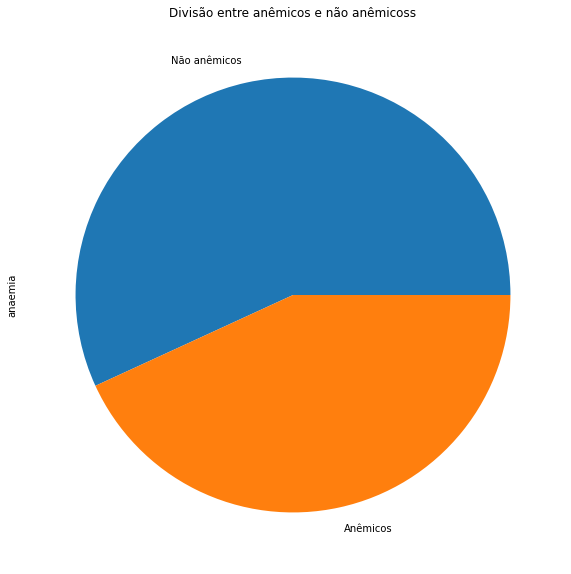

In [ ]:
# Analisando a distribuição entre anêmicos e não anêmicos
print(dados_pacientes["anaemia"].value_counts(normalize=True))
dados_pacientes["anaemia"].value_counts(normalize = True).plot.pie(figsize = (10,10),
                                                                   labels = ['Não anêmicos', 'Anêmicos'],
                                                                   title = "Divisão entre anêmicos e não anêmicoss")

0    0.648829
1    0.351171
Name: high_blood_pressure, dtype: float64


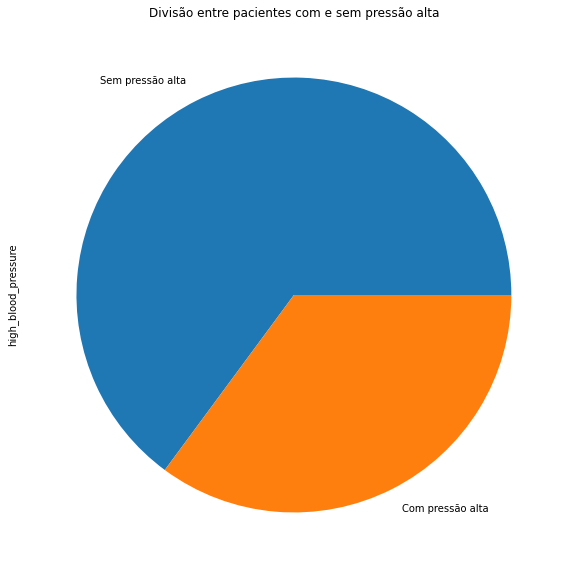

In [ ]:
# Analisando a distribuição entre pacientes com e sem pressão alta
print(dados_pacientes["high_blood_pressure"].value_counts(normalize=True))
dados_pacientes["high_blood_pressure"].value_counts(normalize = True).plot.pie(figsize = (10,10),
                                                                               labels = ['Sem pressão alta', 'Com pressão alta'],
                                                                               title = "Divisão entre pacientes com e sem pressão alta")

0    0.58194
1    0.41806
Name: diabetes, dtype: float64


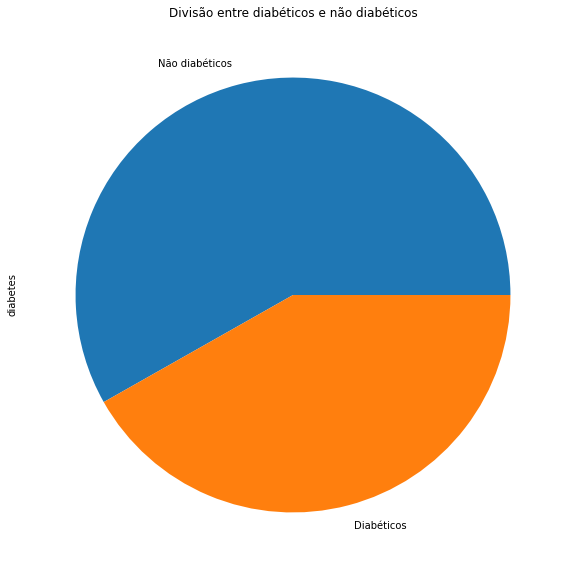

In [ ]:
# Analisando a distribuição entre diabéticos e não diabéticos
print(dados_pacientes["diabetes"].value_counts(normalize=True))
dados_pacientes["diabetes"].value_counts(normalize = True).plot.pie(figsize = (10,10),
                                                                    labels = ['Não diabéticos', 'Diabéticos'],
                                                                    title = "Divisão entre diabéticos e não diabéticos")

0    0.67893
1    0.32107
Name: smoking, dtype: float64


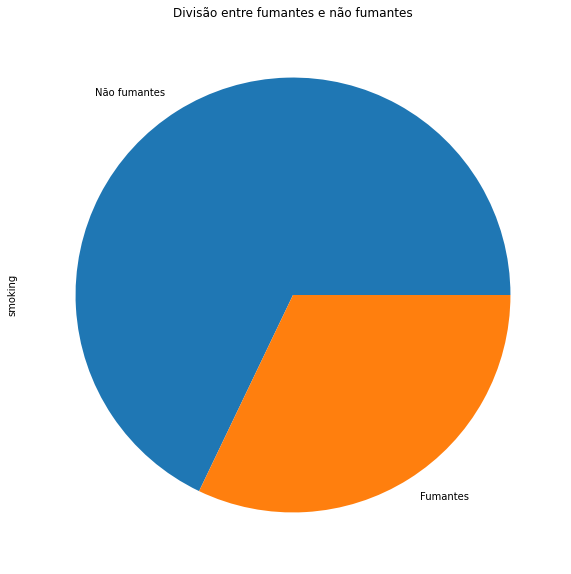

In [ ]:
# Analisando a distribuição entre fumantes e não fumantes
print(dados_pacientes["smoking"].value_counts(normalize=True))
dados_pacientes["smoking"].value_counts(normalize = True).plot.pie(figsize = (10,10),
                                                                   labels = ['Não fumantes', 'Fumantes'],
                                                                   title = "Divisão entre fumantes e não fumantes")

1    0.648829
0    0.351171
Name: sex, dtype: float64


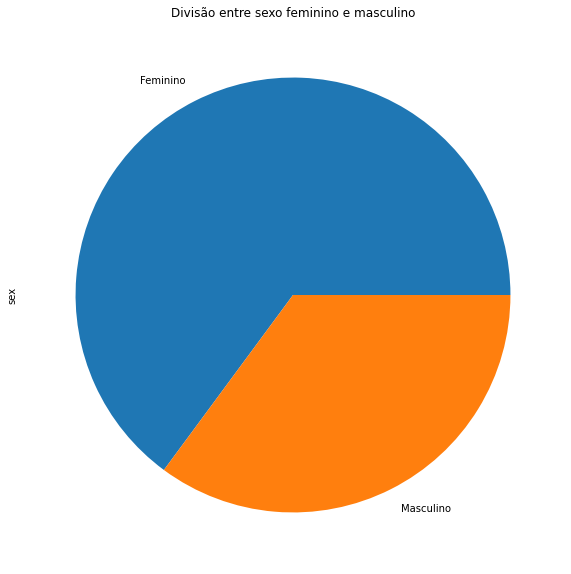

In [ ]:
# Analisando a distribuição entre pacientes do sexo masculino e feminino
print(dados_pacientes["sex"].value_counts(normalize=True))
dados_pacientes["sex"].value_counts(normalize = True).plot.pie(figsize = (10,10),
                                                                   labels = ['Feminino', 'Masculino'],
                                                                   title = "Divisão entre sexo feminino e masculino")

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64


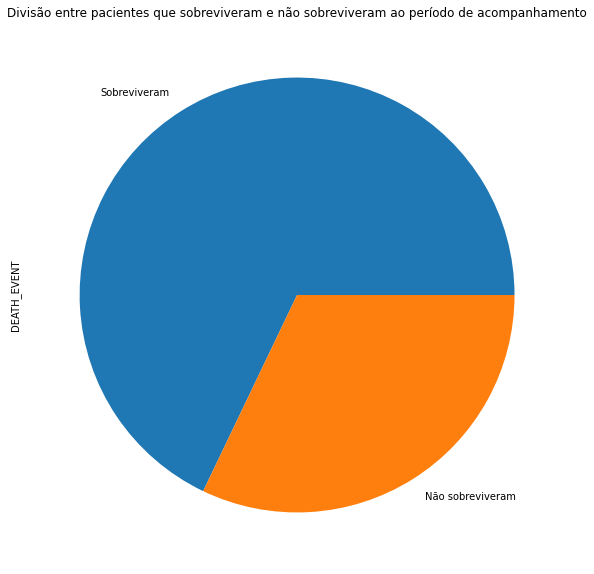

In [ ]:
# Analisando a distribuição entre pacientes que sobreviveram e não sobreviveram ao período de acompanhamento
print(dados_pacientes["DEATH_EVENT"].value_counts(normalize=True))
dados_pacientes["DEATH_EVENT"].value_counts(normalize = True).plot.pie(figsize = (10,10),
                                                                   labels = ['Sobreviveram', 'Não sobreviveram'],
                                                                   title = "Divisão entre pacientes que sobreviveram e não sobreviveram ao período de acompanhamento")

Percebemos que há uma diferença considerável entre a maioria do sexo feminino e minoria do sexo masculino, mas que não necessariamente indica uma maior propensão a ter insuficiência cardíaca.

32% dos pacientes com insuficiência cardíaca não sobreviveram ao período de acompanhamento. Se a amostra dos 299 obtido é generalizável, isso mostra uma altíssima taxa de mortalidade para quem é acometido da insuficiência.

Anemia e diabetes acometem quase metade dos pacientes, cada. Além disso, pressão alta e "fumantes" descrevem mais de um quarto dos pacientes, cada. Isso nos leva a pensar que pacientes sem essas doenças associadas ao funcionamento cardiovascular são raros dentre os casos de insuficiência cardíaca. Testamos a hipótese no conjunto de dados:


0    22
1    13
Name: DEATH_EVENT, dtype: int64
0    0.628571
1    0.371429
Name: DEATH_EVENT, dtype: float64


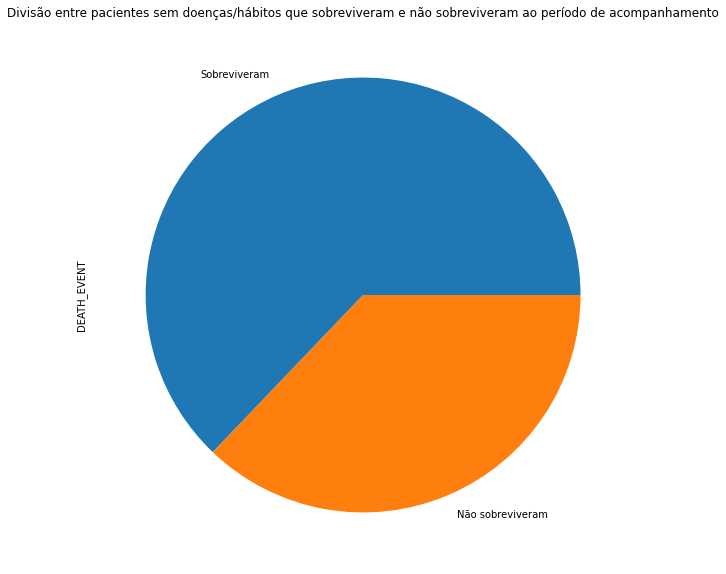

In [ ]:
pacientes_sem_doencas_habitos = dados_pacientes[(dados_pacientes['anaemia'] == 0)
                                        & (dados_pacientes['smoking'] == 0)
                                        & (dados_pacientes['high_blood_pressure'] == 0)
                                        & (dados_pacientes['diabetes'] == 0)]
# Analisando a distribuição entre pacientes que sobreviveram e não sobreviveram ao período de acompanhamento

print(pacientes_sem_doencas_habitos["DEATH_EVENT"].value_counts(normalize=False))
print(pacientes_sem_doencas_habitos["DEATH_EVENT"].value_counts(normalize=True))
pacientes_sem_doencas_habitos["DEATH_EVENT"].value_counts(normalize = True).plot.pie(figsize = (10,10),
                                                                   labels = ['Sobreviveram', 'Não sobreviveram'],
                                                                   title = "Divisão entre pacientes sem doenças/hábitos que sobreviveram e não sobreviveram ao período de acompanhamento")

Como previsto, apenas uma pequena parte, 35 pacientes dos 299, não possuem nenhuma doença nem fumam. Entretanto, entre eles a mortalidade é maior, o que pode significar que o conjunto de pacientes com essas características é pequeno para descrever esse comportamento. Ainda assim, podemos tentar observar as mesmas características, porém desconsiderando se o paciente fuma ou não, já que existem várias graduações de dependência do tabaco e esse hábito pode não estar diretamente relacionado ao funcionamento cardiovascular como as outras doenças. Fazemos o novo teste:

0    48
1    19
Name: DEATH_EVENT, dtype: int64
0    0.716418
1    0.283582
Name: DEATH_EVENT, dtype: float64


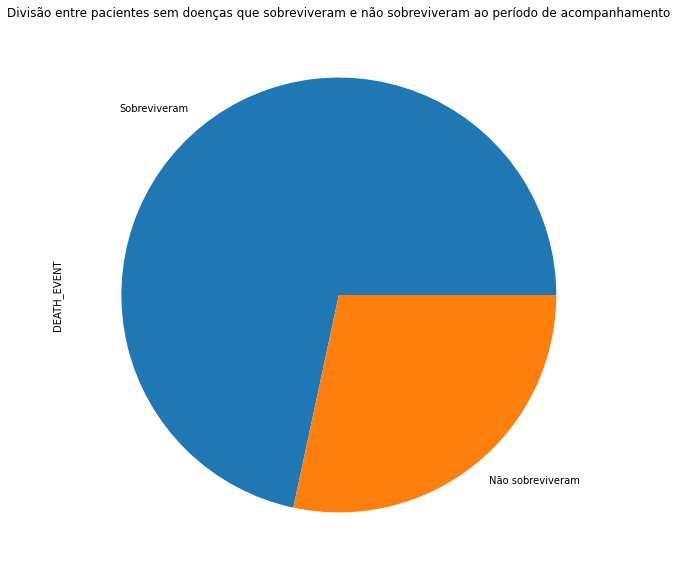

In [ ]:
pacientes_sem_doencas = dados_pacientes[(dados_pacientes['anaemia'] == 0)
                                        & (dados_pacientes['high_blood_pressure'] == 0)
                                        & (dados_pacientes['diabetes'] == 0)]
# Analisando a distribuição entre pacientes que sobreviveram e não sobreviveram ao período de acompanhamento

print(pacientes_sem_doencas["DEATH_EVENT"].value_counts(normalize=False))
print(pacientes_sem_doencas["DEATH_EVENT"].value_counts(normalize=True))
pacientes_sem_doencas["DEATH_EVENT"].value_counts(normalize = True).plot.pie(figsize = (10,10),
                                                                   labels = ['Sobreviveram', 'Não sobreviveram'],
                                                                   title = "Divisão entre pacientes sem doenças que sobreviveram e não sobreviveram ao período de acompanhamento")

Considerando também fumantes, a mortalidade entre quem não tem diabetes, anemia ou pressão alta é menor em relação a quem tem ao menos uma delas, porém não significativamente. Isso pode nos indicar que essas doenças não estão diretamente e individualmente relacionadas à mortalidade de pacientes com insuficiência cardíaca.

### Atributos numéricos não binários

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


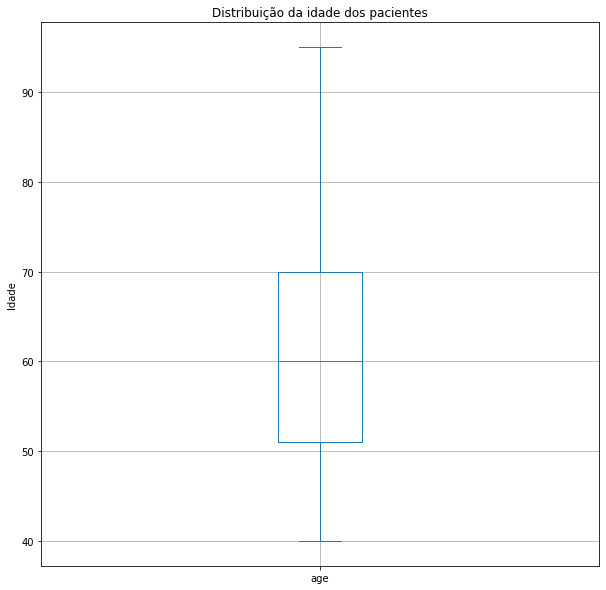

In [ ]:
# Analisando a distribuição da idade dos pacientes
print(dados_pacientes["age"].describe())
dados_pacientes.plot.box(y="age",
                         figsize = (10,10),
                         grid = True,
                         ylabel="Idade",
                         showfliers = True,
                         title = "Distribuição da idade dos pacientes")

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64


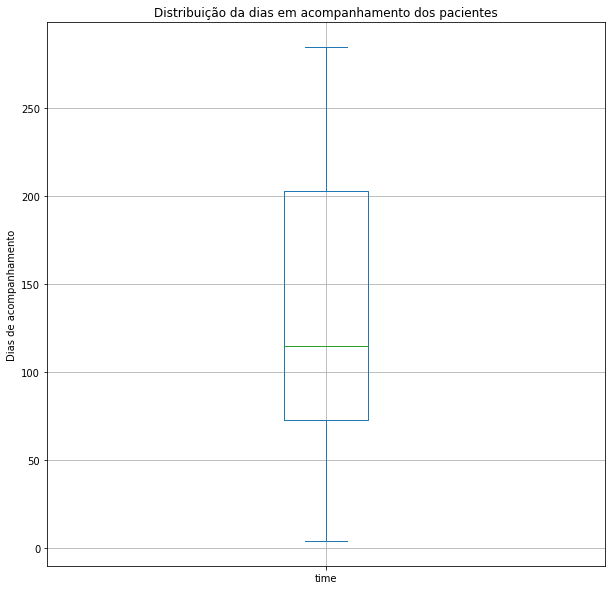

In [ ]:
# Analisando a distribuição da idade dos pacientes
print(dados_pacientes["time"].describe())
dados_pacientes.plot.box(y="time",
                         figsize = (10,10),
                         grid = True,
                         ylabel="Dias de acompanhamento",
                         showfliers = True,
                         title = "Distribuição da dias em acompanhamento dos pacientes")

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64


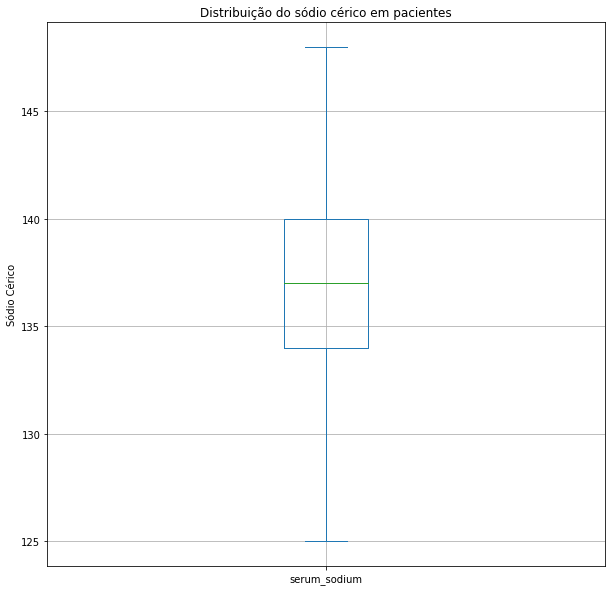

In [ ]:
# Analisando a distribuição da sódio cérico
print(dados_pacientes["serum_sodium"].describe())
dados_pacientes.plot.box(y="serum_sodium",
                         figsize = (10,10),
                         grid = True,
                         ylabel="Sódio Cérico",
                         showfliers = False,
                         title = "Distribuição do sódio cérico em pacientes")

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64


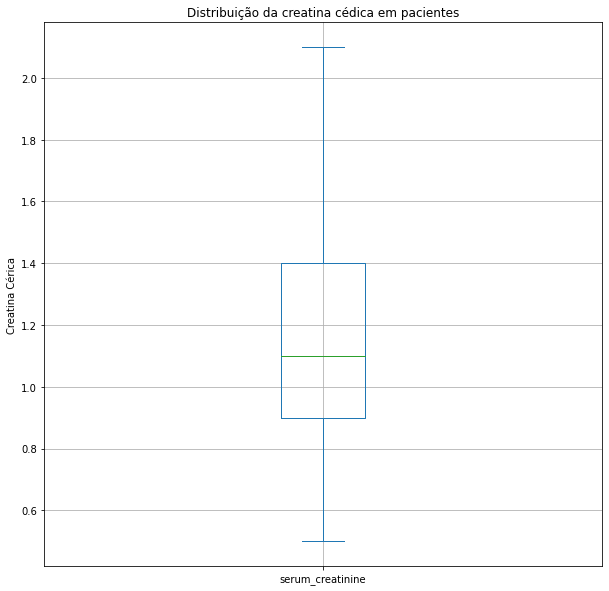

In [ ]:
# Analisando a distribuição da sódio cérico
print(dados_pacientes["serum_creatinine"].describe())
dados_pacientes.plot.box(y="serum_creatinine",
                         figsize = (10,10),
                         grid = True,
                         ylabel="Creatina Cérica",
                         showfliers = False,
                         title = "Distribuição da creatina cédica em pacientes")

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64


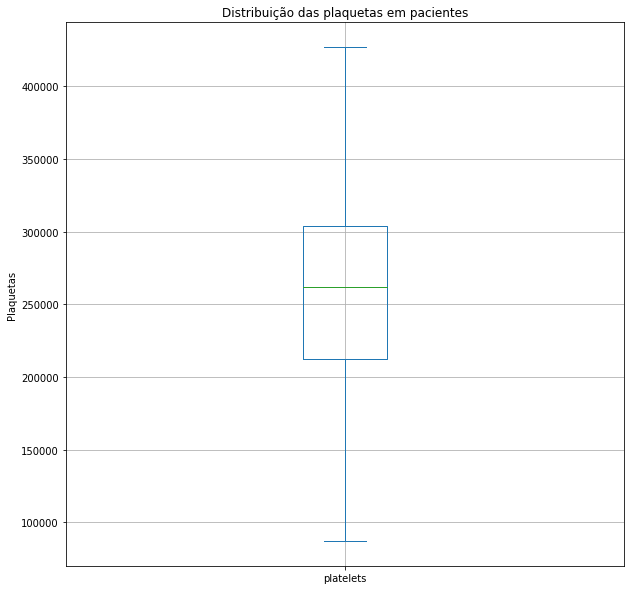

In [ ]:
# Analisando a distribuição de plaquetas
print(dados_pacientes["platelets"].describe())
dados_pacientes.plot.box(y="platelets",
                         figsize = (10,10),
                         grid = True,
                         ylabel="Plaquetas",
                         showfliers = False,
                         title = "Distribuição das plaquetas em pacientes")

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64


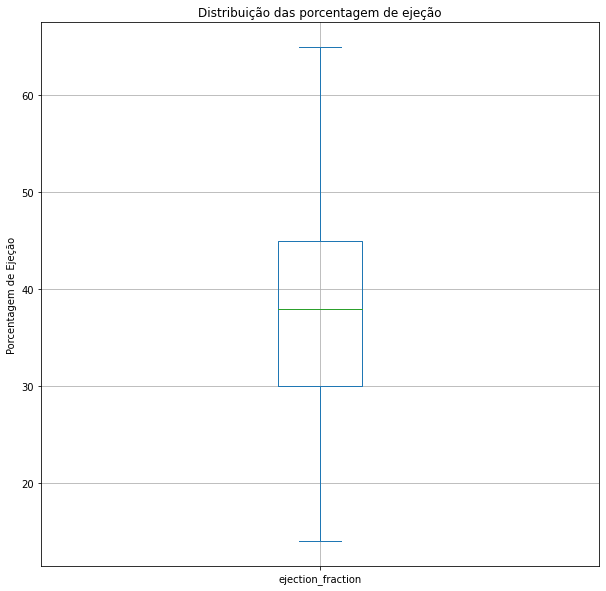

In [ ]:
# Analisando a distribuição da porcentagem de ejeção
print(dados_pacientes["ejection_fraction"].describe())
dados_pacientes.plot.box(y="ejection_fraction",
                         figsize = (10,10),
                         grid = True,
                         ylabel="Porcentagem de Ejeção",
                         showfliers = False,
                         title = "Distribuição das porcentagem de ejeção")

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64


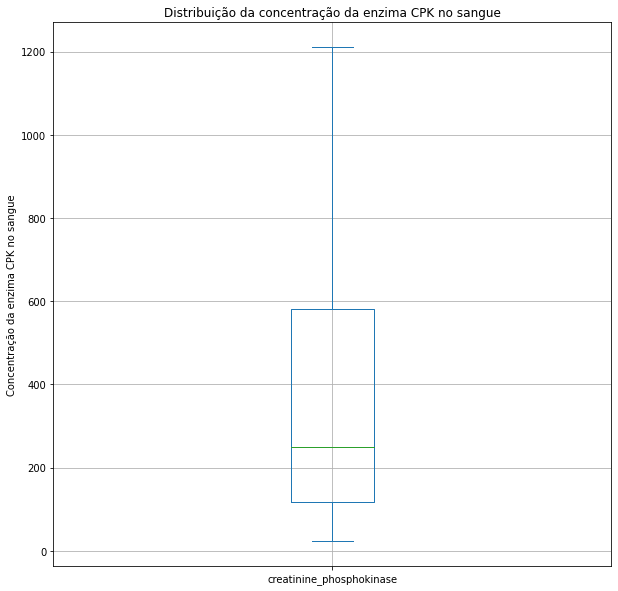

In [ ]:
# Analisando a distribuição da concentração da enzima CPK no sangue
print(dados_pacientes["creatinine_phosphokinase"].describe())
dados_pacientes.plot.box(y="creatinine_phosphokinase",
                         figsize = (10,10),
                         grid = True,
                         ylabel="Concentração da enzima CPK no sangue",
                         showfliers = False,
                         title = "Distribuição da concentração da enzima CPK no sangue")

A maior parte desses atributos está distribuída esparçamente com pouca diferença na distância do primeiro ou terceiro quartil para o segundo quartil.

Quanto à idade dos pacientes, a grande maioria é composta por idosos, chegando a mais de 75% dos pacientes passarem dos 50 anos, o que faz sentido para doenças cardiovasculares, pois são mais frequentes nessa faixa de idade.

O tempo que os pacientes passam em acompanhamento varia bastante, com a grande maioria passando mais de 3 meses em acompanhamento.

Quanto aos outros valores, vale comentar o desbalanceamento na distribuição da concentração da enzima CPK, em que as diferenças de distância Q1-Q2 e Q2-Q3 são grandes entre si. Para o sódio cérico também ocorre um desbalanceamento, mas principalmente com relação ao 5% e 95% com o 50% da distribuição.

# Analisando relação entre os atributos

Para fazer a relação entre os valores, precisamos normalizá-los. Fazemos isso através da média e do desvio padrão.

In [7]:
normalizado = dados_pacientes.drop(["anaemia", "diabetes", "high_blood_pressure", "sex"], axis = 1)
normalizado = (normalizado-normalizado.mean())/normalizado.std()

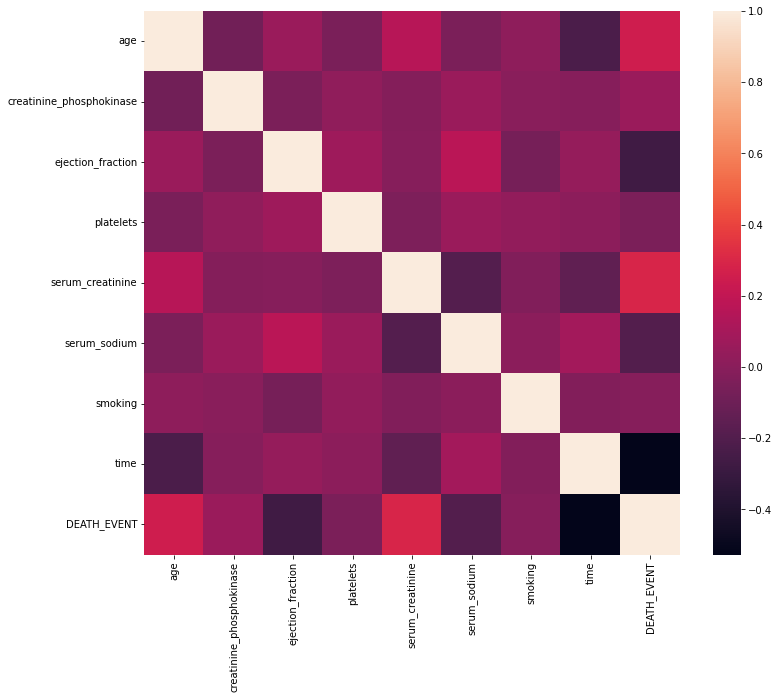

In [11]:
# Fazendo o heatmap
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(normalizado.corr());

Percebemos que há pouca relação entre pares de atributos, a  não passando de 50% de correlação absoluta.

Os atributos mais correlacionados com a morte são:
* Idade (diretamente)
* Porcentagem de ejeção (inversamente)
* Creatinina Cérica (diretamente)
* Tempo de acompanhamento (inversamente)

Percebemos que valores altos de creatinina cérica aumentam o risco de morte. O mesmo vale para a idade, o que faz sentido lógico. A porcentagem de ejeção menor aumentar o risco de morte também faz sentido, pois menos sangue está sendo bombeado pelo coração. Por fim, o tempo de acompanhamento mais baixo se correlaciona com a morte por casos mais graves não durarem muito tempo.

Outra correlação importante de se notar é entre idade e tempo de acompanhamento: quanto maior a idade, menor o tempo, porque morre-se rápido.